# Assignment: Measuring Brownian Motion in Microscopy

## Adapted from the jupyter notebook provided:
Importing all the necessary libraries.

In [1]:
import pandas as pd
import pylab as plt
import numpy as np
from scipy.optimize import curve_fit

Defining all the necessary functions.

In [3]:
#Define your gaussian (statistical)
def gaussian(x, mu, sigma):
    y = 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (x - mu)**2 / (2 * sigma**2))
    return y

def gaussianDiffus(x, t, D):
    y = (1/np.sqrt(4*np.pi * D *t)) * np.exp(-(x**2) / (4 *D*t))
    return y

Extracting data from the given csv file, 'track.csv'. This file has to be in the same directory as this python file.

In [4]:
from IPython.display import HTML
def returnXYdiff(df):
    n_frames = df['Track'].unique()
    Xdiff=[]
    Ydiff=[]
    for n in n_frames:
        xy = df[df['Track']==n]
        xf = xy.diff()
        for index, row in xf.iterrows():
            if index > 0:
                Xdiff.append(row['X'])
                Ydiff.append(row['Y'])
    return Xdiff, Ydiff

track_data = pd.read_csv("track.csv")
track_data.head()
xdel, ydel = returnXYdiff(track_data)

# Beginning of the assignment: 


## Part 1: Histogram plots of delta X and delta Y.

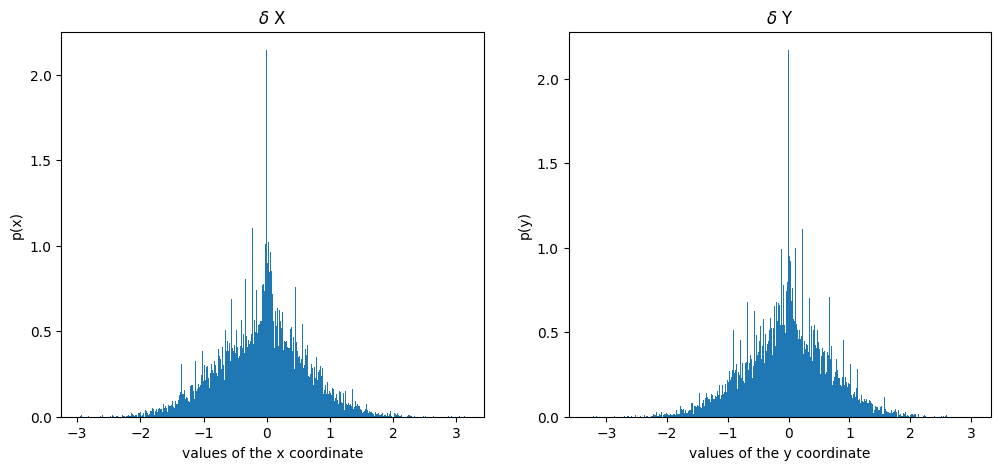

In [5]:
# c = no. of bins
c = 1000

# Syntax for side by side histogram plots.
fig,ax= plt.subplots(1,2, figsize=(12,5))

# scaled values of x and y to micrometer values.
xdel = np.array(xdel)
ydel = np.array(ydel)
xdel_scaled = xdel/4.43
ydel_scaled = ydel/4.43

x_count, x_bins, x_ignored = ax[0].hist(xdel_scaled, c, density=True)
ax[0].set_xlabel('values of the x coordinate')
ax[0].set_ylabel('p(x)')
ax[0].set_title('$\delta$ X')

y_count, y_bins, y_ignored = ax[1].hist(ydel_scaled, c, density=True)
ax[1].set_xlabel('values of the y coordinate') 
ax[1].set_ylabel('p(y)')
ax[1].set_title('$\delta$ Y')
plt.show()


## Part 2: Fitting gaussing curves to the data points and extracting out the values of means and standard deviations for both the x and y coordinates.

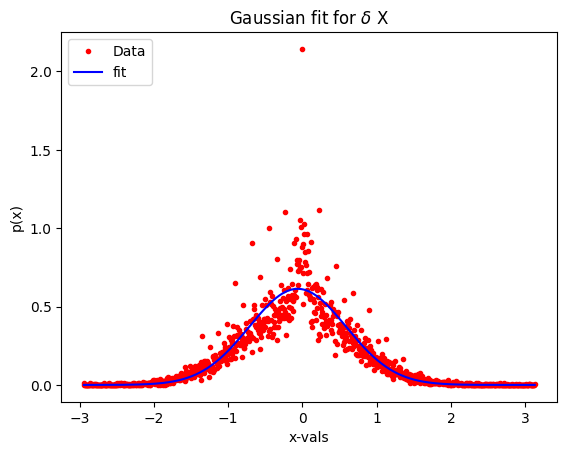

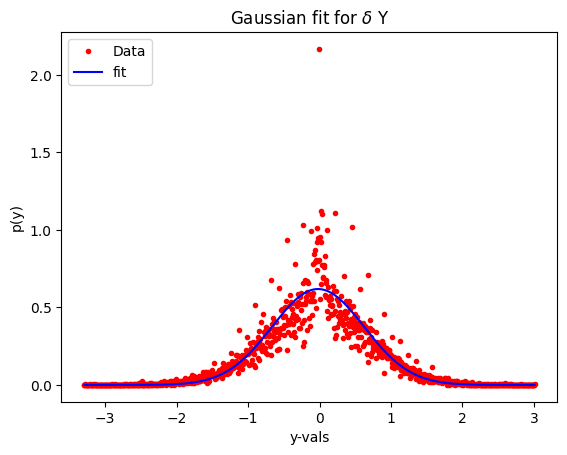

Values of the mean displacement along the X axis and the standard deviation respectively are given as: [-0.0640327007753241, 0.6507383171212744]

Values of the mean displacement along the X axis and the standard deviation respectively are given as: [-0.021411580140222708, 0.64462538725257]


In [6]:
# c = no. of bins
c = 1000

# Gaussian fit for delta X.
x_exp_x = x_bins[1:c]
x_exp_y = x_count[1:c]
x_popt, x_pcov = curve_fit(gaussian, x_exp_x, x_exp_y)
plt.plot(x_exp_x,x_exp_y,'or',label='Data', markersize=3)


f_x=plt.plot(x_exp_x, gaussian(x_exp_x,x_popt[0],x_popt[1]),'-b',label='fit')
plt.title('Gaussian fit for $\delta$ X')
plt.xlabel('x-vals')
plt.ylabel('p(x)')
plt.legend(loc='upper left')
plt.show()


# Gaussian fit for delta Y.
y_exp_x = y_bins[1:c]
y_exp_y = y_count[1:c]

y_popt, y_pcov = curve_fit(gaussian, y_exp_x, y_exp_y)
plt.plot(y_exp_x,y_exp_y,'or',label='Data', markersize=3)


f_y=plt.plot(y_exp_x, gaussian(y_exp_x,y_popt[0],y_popt[1]),'-b',label='fit')
plt.title('Gaussian fit for $\delta$ Y')
plt.xlabel('y-vals')
plt.ylabel('p(y)')
plt.legend(loc='upper left')
plt.show()

print(f'Values of the mean displacement along the X axis and the standard deviation respectively are given as: {[x_popt[0], x_popt[1]]}')
print()
print(f'Values of the mean displacement along the X axis and the standard deviation respectively are given as: {[y_popt[0], y_popt[1]]}')

## Part 3: Calculation of quantities.

Standard error is given as:

$$SE(\sigma)= \frac{\sigma}{\sqrt{2N-2}}$$

If there is no drift, $\mu = 0$. If the mean is $2 \times SE$ away from zero, excess drift is probable.

<br>

Expression for diffusion coefficient, $D$:

$$D= \frac{\sigma^2}{2\tau}$$ 
Where, $\tau$ is the time interval of observation.

<br>

Expression for the final diffusion coefficient which we are supposed to use is the average of the diffusion coefficients in the X and the Y directions [Bi4233- L01:]:

$$D_{avg}= \frac{D_x + D_y}{2}$$ 


In [7]:
N = len(xdel)

mu_x, sigma_x = [x_popt[0], x_popt[1]]
mu_y, sigma_y = [y_popt[0], y_popt[1]]

def StandErr(sigma, N):
    return sigma/np.sqrt(2*N-2)

StandErr_x = StandErr(sigma_x,N)
StandErr_y = StandErr(sigma_y,N)

IndicationOfDrift_x = abs(2*StandErr_x - mu_x)
IndicationOfDrift_y = abs(2*StandErr_y - mu_y)

print("Indication Of drift in X direction :", IndicationOfDrift_x)
print("Indication Of drift in Y direction :", IndicationOfDrift_y)


# If the value of IndicationOfDrift_x > 0, it implies that there is drift in the x direction or there is error in the data. 
# If the value of IndicationOfDrift_x ~ 0, it implies that there is no drift in the x direction.

# If the value of IndicationOfDrift_y > 0, it implies that there is drift in the y direction or there is error in the data.
# If the value of IndicationOfDrift_y ~ 0, it implies that there is no drift in the x direction.


# Diffusion coefficient for x and y.

tau = 0.5 # seconds

D_x = sigma_x**2/(2*tau)
D_y = sigma_y**2/(2*tau)

D = [D_x, D_y]
D_avg = np.mean(D)
print("Average diffusion coefficient:",D_avg)

Indication Of drift in X direction : 0.06893705915327351
Indication Of drift in Y direction : 0.0262698677735631
Average diffusion coefficient: 0.4195011236301771


## Part 4: Determination of the avogadro's constant, $N_A$.

 Expression of avogadro's constant in terms of boltzmann constant, $K_B$. 

$$N_A= \frac{R}{K_B} \space \space \space \space \space \space \space \space \space \space \space \space \space \space \space \space (1)$$
Where, $R$ is the universal gas constant.

<br>


Expression of Diffsuion coefficient from the Einstein- Smoluchowski relation:

$$D= \frac{K_BT}{f} \space \space \space \space \space \space \space \space \space \space \space \space \space \space \space \space (2)$$
Where, $K_B$ is the Boltzmann constant, $T$ the absolute temperature and $f$ the frictional drag coefficient.

<br>

Expression for drag coefficient $f$ from stokes' relation (for a spherical object):
$$f= 6 \pi \eta r   \space \space \space \space \space \space \space \space \space \space \space \space \space \space \space \space (3)$$ 

where $r$ is the radius of the spherical object and $\eta$ is the viscosity of the fluid providing the drag force.

<br>

Thus, from $(1)$ , $(2)$ and $(3)$, we get the final expression for avogadro's constant as:
$$ N_A= \frac{RT}{6 \pi \eta r D} $$



In [8]:
r = 0.5                                                 # Radius of the diffsuing beads in micrometers.

R = 8.314                                               # Gas constant in J/mol/K.

T = 298                                                 # Temperature in Kelvin.

eta = 0.001                                             # Viscosity of water in Pa.s.

def avogadro_constant(D, R, T, eta, r):
    D_SI = D*10**-12                                    # Converting D to SI units.
    r_SI = r*10**-6                                     # Converting r to SI units.
    return (R * T)/(6 * np.pi * eta * r_SI* D_SI)

N_A = avogadro_constant(D_avg, R, T, eta, r)            # Avogadro's constant.

print("The Avogadro's constant obtained from the given data is:",N_A)

The Avogadro's constant obtained from the given data is: 6.266456487709677e+23
